

RMSE:  0.013
0.9282859481826764


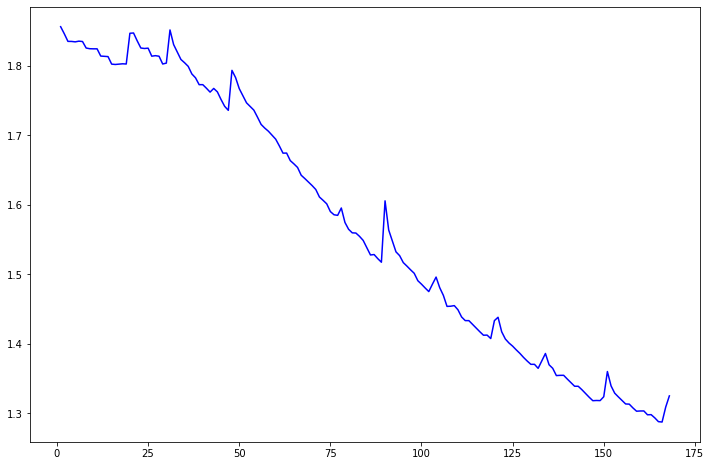

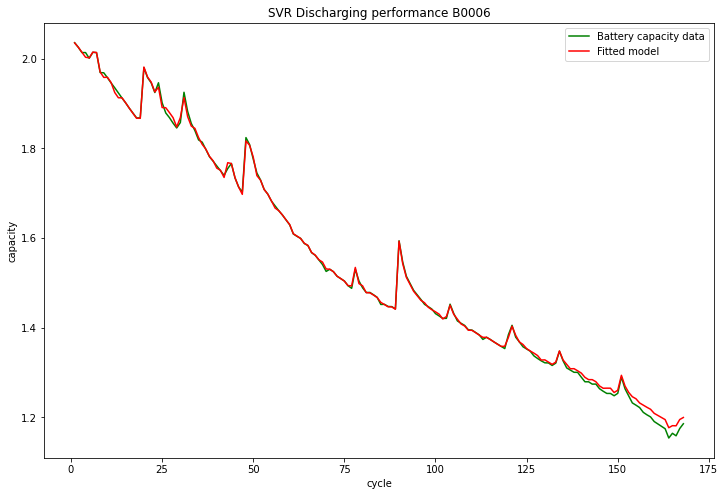

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error # for calculating the cost function
%matplotlib inline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn import metrics # for the check the error and accuracy of the model


from mat2json import loadMat
from util import getBatteryCapacity, getChargingValues, getDischargingValues, getDataframe, series_to_supervised, rollingAverage



B0005 = loadMat('B0005.mat')

B0005_capacity = getBatteryCapacity(B0005)
print()
fig, ax = plt.subplots(1, figsize=(12, 8))

ax.plot(B0005_capacity[0], B0005_capacity[1], color='blue', label='Battery-05')


dfB0005 = getDataframe(B0005)



df = pd.read_csv(r'/Users/mac/Discharge6_H1.csv', encoding= 'unicode_escape')

f1=['cycle','time','Max_Temp_Time']



X = df[f1]
Y = df['Capacity']



X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
#parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1,2,3,4,5,6,7,8,9, 10],'gamma': [0.00001,1e-7, 1e-4],'epsilon':[0.0001,0.1,0.2,0.5,0.3]}
#svr = SVR()
#clf = GridSearchCV(svr, parameters,scoring='neg_root_mean_squared_error')
#clf.fit(X_train,y_train)
#print(clf.best_params_)



best_svr = SVR(C=10, epsilon=0.0001, gamma=1e-07, cache_size=200,kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

best_svr.fit(X_train,y_train)
y_pred = best_svr.predict(X.values)
y_pred1 = best_svr.predict(X_test.values)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred1)), '.3f'))
print("\nRMSE: ", rmse)
print(metrics.r2_score(y_test,y_pred1))


fig, ax = plt.subplots(1, figsize=(12, 8))

ax.plot(X['cycle'], Y, color='green', label='Battery capacity data')
ax.plot(X['cycle'], y_pred, color='red', label='Fitted model')
ax.set(xlabel='cycle', ylabel='capacity', title='SVR Discharging performance B0006')
ax.legend()



